In [9]:
from pathlib import Path
import os
from ai_sentiment.nlp import SentimentClassifier
import numpy as np
import time
import yaml
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import random

In [5]:
# Path to scrapes to look at
csv_path = Path("data/news_round_3_results.csv")

# Project root dir
project_dir = Path(os.path.abspath(".."))

In [6]:
results = SentimentClassifier.loadResults(project_dir / csv_path)
results

,Unnamed: 0.1,Unnamed: 0,titles,body_contents,tags,sentiment_score,positive_words,negative_words
0,0,0,OpenAI Rolls Out New GPT-4 Version of Chatbot ...,The company behind the viral chatbot ChatGPT l...,WSJ,0.17,"['new', 'more', 'powerful', 'capable', 'latest...","['behind', 'artificial', 'predictable', 'previ..."
1,1,1,Bosses Are Catching Job Applicants Using ChatG...,It was an unexpected problem. Earlier this yea...,WSJ,0.09,"['unexpected', 'exactly', 'normally', 'pretty'...","['fail', 'other', 'artificial', 'long', 'previ..."
2,2,2,What Is ChatGPT? What to Know About the AI Cha...,The release of OpenAI’s ChatGPT late November ...,WSJ,0.08,"['new', 'more', 'own', 'intellectual', 'develo...","['late', 'artificial', 'serious', 'other', 'ot..."
3,3,3,Baidu Hurries to Ready China’s First ChatGPT E...,A week away from the March 16 launch of Baidu ...,WSJ,0.14,"['familiar', 'powerful', 'highly', 'first', 'f...","['green', 'other', 'failure', 'difficult', 'no..."
4,4,4,ChatGPT and Cyber Risk,Key Points: ChatGPT is a new artificial intell...,WSJ,0.11,"['new', 'currently', 'significant', 'popular',...","['artificial', 'criminal', 'other', 'firm', 'u..."
...,...,...,...,...,...,...,...,...
171,3,3,Science Fiction Magazines Battle a Flood of Ch...,It could be a tale from science fiction itself...,NYT,0.13,"['real', 'better', 'first', 'able', 'certain',...","['artificial', 'down', 'typically', 'few', 'ba..."
172,0,0,Microsoft to Limit Length of Bing Chatbot Conv...,Microsoft will start limiting conversations wi...,NYT,0.02,"['new', 'new', 'quickly', 'early', 'unusual', ...","['artificial', 'less', 'other', 'wide', 'expec..."
173,1,1,Dear Mr. Chatbot: You Give Me Chills,To the Editor: Re “Bing’s Chatbot Drew Me In a...,"NYT, Opinion, Letters",0.00,"['sure', 'much', 'social', 'new', 'love', 'suc...","['bad', 'false', 'cold', 'other']"
174,2,2,Revenge of the Chatbots,“Not ready for human contact”? Microsoft’s dec...,NYT,0.06,"['more', 'nearly', 'live', 'pretty', 'much', '...","['not', 'past', 'spent', 'not', 'not', 'badly'..."


In [10]:
# Append all text to a single string
def appendResultWords(results, key, exclude=[]):
    words = []
    for result in results[key]:
        # Load array of words
        result_arr = yaml.load(result, Loader=yaml.FullLoader)
        for w in result_arr:
            # Exclude words if probided
            if w not in exclude:
                words.append(w.replace(" ", ""))
    # Shuffle words to break repeats
    random.shuffle(words) 
    
    #Return string of words
    return " ".join(words)


In [16]:
pos_words = appendResultWords(results, "positive_words")
neg_words = appendResultWords(results, "negative_words", ["artificial"])

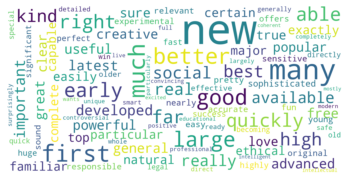

In [17]:
# Generate word cloud image for positive words
output_path_pos = Path("imgs/news_wordcloud_pos.png")
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=2, width=800, height=400).generate(pos_words)
wordcloud.to_file(project_dir / output_path_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

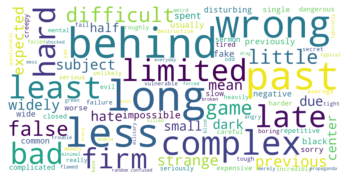

In [18]:
# Generate word cloud image for negative words
output_path_pos = Path("imgs/news_wordcloud_neg.png")
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=2, width=800, height=400).generate(neg_words)
wordcloud.to_file(project_dir / output_path_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

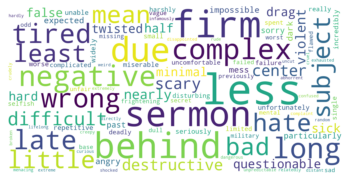

In [19]:
# Get results for New York Post
nypost_results = results[results["tags"] == "NYPost"]

# Append all text to a single string, exclude artificial
nyp_neg_words = appendResultWords(nypost_results, "negative_words", ["artificial"])

# Generate word cloud image for negative words for the new york post
output_path_pos = Path("imgs/nypost_wordcloud_neg.png")
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=2, width=800, height=400).generate(nyp_neg_words)
wordcloud.to_file(project_dir / output_path_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

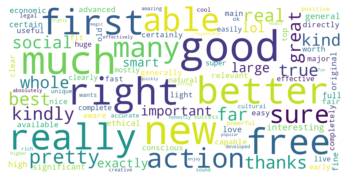

In [20]:
reddit_path = Path("data/results/reddit_results_0.csv")

reddit_results = SentimentClassifier.loadResults(project_dir / reddit_path)

# Append all text to a single string, exclude artificial
reddit_pos = appendResultWords(reddit_results, "positive_words")

# Generate word cloud image for negative words for the new york post
output_path_pos = Path("imgs/reddit_wordcloud_pos.png")
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=2, width=800, height=400).generate(reddit_pos)
wordcloud.to_file(project_dir / output_path_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
reddit_neg = appendResultWords(reddit_results, "negative_words")

# Generate word cloud image for negative words for the new york post
output_path_pos = Path("imgs/reddit_wordcloud_neg.png")
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=2, width=800, height=400).generate(reddit_neg)
wordcloud.to_file(project_dir / output_path_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

AttributeError: 'list' object has no attribute 'join'